
1. Plotting polynomials
2. Plotting trigonometric functions
3. Finding the point of intersection between a linear and quadratic graph
4. Finding the area (triangle, rectangle, square, and circle.)
5. Basic addition, subtraction, multiplication.

What do you want to pick (use the numbers next to the options): 1
Enter your equation using 'x' as the variable and following 'ax^2 + 3' for example: 72x^2 + 9 


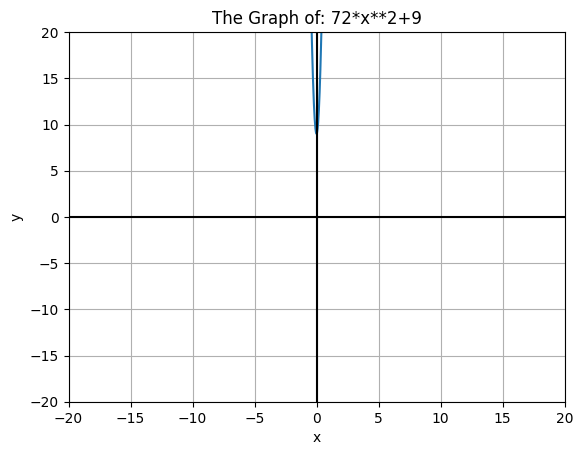

In [ ]:
print("""
1. Plotting polynomials
2. Plotting trigonometric functions
3. Finding the point of intersection between a linear and quadratic graph
4. Finding the area (triangle, rectangle, square, and circle.)
5. Basic addition, subtraction, multiplication.
""")

import numpy as np
import matplotlib.pyplot as plt
import math as m

choice = int(input("What do you want to pick (use the numbers next to the options): "))

def poly():
    equa = input("Enter your equation using 'x' as the variable and following 'ax^2 + 3' for example: ")

    equa = equa.replace('^', '**')
    equa = equa.replace('x', '*x')
    equa = equa.replace(" ", "")

    try:
        x_base = np.linspace(-10, 10, 1000)
        y = np.array([eval(equa) for x in x_base])

        plt.plot(x_base, y)
        plt.title(f"The Graph of: {equa}")
        # this allows me to plug in the equation as the title of the graph
        plt.xlabel("x")
        plt.ylabel("y")
        plt.grid(True)
        # this line basically allows me to make it a + shape so I can make it look cooler.
        plt.axhline(0, color='black', linewidth=1.5)
        plt.axvline(0, color='black', linewidth=1.5)
        plt.xlim(-20, 20)
        plt.ylim(-20, 20)
        # simple graph size limiatioms
        plt.show()
    except:
        print("You didn't put a proper equation")
        print("Here, try something like 2x^2 + 3, you DO NOT do 2*x**2 + 3")

def trig():
    def sin():
        s = float(input("Enter the coefficient for your sin equation (like y = sin(Your Number * x)): "))

        x = np.linspace(0, 2 * np.pi, 2000)
        y = np.sin(s * x)

        plt.figure(figsize=(10, 2.5))
        plt.plot(x, y, label=f'y = sin({s} * x)')
        plt.ylim(-1, 1)
        plt.grid(True)
        plt.title(f'y = sin({s} * x)')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    def cos():
        c = int(input("What is your number? "))

        x = np.linspace(0, 2 * np.pi, 2000)
        y = np.cos(c * x)

        plt.figure(figsize=(10, 2.5))
        plt.plot(x, y, label=f'y = cos({c} * x)')
        plt.ylim(-1, 1)
        plt.grid(True)
        plt.title(f'y = cos({c} * x)')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    def tan():
        t = int(input("Enter the coefficient for y = tan(t * x): "))

        x = np.linspace(-2 * np.pi, 2 * np.pi, 10000)
        y = np.tan(t * x)

        # same thing with those tangent spikes, because they're really annoying if you'd like you can turn this off and see..
        y = np.ma.masked_where(np.abs(y) > 10, y)

        plt.figure(figsize=(10, 5))
        plt.plot(x, y, label=f'y = tan({t} * x)')

        plt.ylim(-6.5, 6.5)
        plt.title(f'y = tan({t} * x)')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
        plt.show()

    def scrape():
        equation = input("Enter an equation (e.g., 'sin 3x + 5' or '4 * sin 2x'): ")

        x = np.linspace(-2 * np.pi, 2 * np.pi, 10000)
        y = np.zeros_like(x)

        equation = equation.replace(' ', '')
        equation = equation.replace('sin', 'sin(').replace('cos', 'cos(').replace('tan', 'tan(')
        equation = equation.replace('x)', 'x)').replace(')sin', ') * sin').replace(')cos', ') * cos').replace(')tan', ') * tan')
# this entire function (scrape) took me a long time to make since I tried to account for every possiblilty, so I had to make sure that if someone had put tan alone for example
# for example it would replace it so that the code would understand, so let me explain, if I write tan, it'll make the computer understand theres another arguement (even though you dont have to write it)
        terms = equation.replace('-', '+-').split('+')

        try:
            for term in terms:
                if 'sin(' in term:
                    coef_str = term.split('sin(')[1].strip(')')
                    coef = float(coef_str.split('x')[0]) if 'x' in coef_str else 1
                    y += np.sin(coef * x)
                elif 'cos(' in term:
                    coef_str = term.split('cos(')[1].strip(')')
                    coef = float(coef_str.split('x')[0]) if 'x' in coef_str else 1
                    y += np.cos(coef * x)
                elif 'tan(' in term:
                    coef_str = term.split('tan(')[1].strip(')')
                    coef = float(coef_str.split('x')[0]) if 'x' in coef_str else 1
                    y += np.tan(coef * x)
                    # this is very important, this mask's the lines for the tan function so it doesnt look like absolute terribleness.
                    y = np.ma.masked_where(np.abs(y) > 10, y)
                else:
                    if 'x' in term:
                        coef, variable = term.split('x')
                        coef = float(coef) if coef else 1
                        y += coef * x
                    else:
                        y += float(term)

        except ValueError as e:
            print("what the hell did you put bro")

        plt.figure(figsize=(10, 10))
        plt.plot(x, y)
        plt.title(f'y = {equation}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)

        if 'sin(' in equation or 'cos(' in equation:
            plt.ylim(-1, 8)  # it just makes it look neater
        elif 'tan(' in equation:
            plt.ylim(-6.5, 6.5)  # ok so these are basically the limts for the graph size so I cam make it look more neat

        plt.show()

    print("""
    1. Sin
    2. Cos
    3. Tan
    4. Special Equation
    """)

    opt = int(input("What type of graph do you want to see? (write 1, 2, 3, 4): "))

    if opt == 1 or opt == 'sin':
        sin()
    elif opt == 2 or opt == 'cos':
        cos()
    elif opt == 3 or opt =='tan':
        tan()
    elif opt == 4:
        scrape()
    else:
        print("What the heck did you put")

def area():
    print("""
    1. Triangle
    2. Rectangle
    3. Square
    4. Circle""")

    shape = str(input("What is your shape? (write the name please) "))

    if shape == '1' or shape == 'Triangle' or shape == 'triangle':
        num1 = int(input("Tell me your height: "))
        num2 = int(input("Tell me your base: "))
        print("Analyzing...")
        area = num1 * num2 / 2
        print("The area is", area)

    elif shape == '2' or shape == 'Rectangle' or shape == 'rectangle':
        num1 = int(input("What is your length: "))
        num2 = int(input("What is your width: "))
        print("Analyzing...")
        area = num1 * num2
        print("The area is", area)
    elif shape == '3' or shape == 'Square' or shape == 'square':
        num1 = int(input("What is your length: "))
        print("Analyzing...")
        print("The area is", num1 ** 2)

    elif shape == '4' or shape == 'Circle' or shape == 'circle':
        rad = int(input("What is your radius: "))
        print("Analyzing...")
        print("The area of the circle is", m.pi * rad ** 2)
    else:
        print("What did you put man?")

def basic():
    print("""
    1. Addition
    2. Subtraction
    3. Multiplication
    4. Division
    5. Square Root
    6. Power
    7. Sin, Cos, Tan
    8. Log
    9. e^
    """)

    opt = (input("Pick what you want to do: "))
    a = float(input("Enter your first number: "))
    b = float(input("Enter your second number: "))

    if opt == '1' or opt == "Add":
        print("Sum {} + {} = {}".format(a, b, a + b))
    elif opt == '2' or opt == "Subtraction":
        print("Sum {} - {} = {}".format(a, b, a - b))
    elif opt == '3' or opt == "Multiplication":
        print("Sum {} x {} = {}".format(a, b, a * b))
    elif opt == '4' or opt == "Division":
        print("Sum {} ÷ {} = {}".format(a, b, a / b))
    elif opt == '5' or opt == "Sqrt" or opt == "Squareroot":
        print("Sum √{} = {}".format(a, m.sqrt(a)))
    elif opt == '6' or opt == "Power":
        print("Sum {} to the power of {} = {}".format(a, b, m.pow(a, b)))
    elif opt == '7' or opt == "Sin" or opt == "Cos" or opt == "Tan":
        print("Sum of sin {} = {}".format(a, m.sin(a)))
        print("Sum of cos {} = {}".format(a, m.cos(a)))
        print("Sum of tan {} = {}".format(a, m.tan(a)))
    elif opt == '8' or opt == "log":
        print("Sum log of {} = {}".format(a, m.log(a)))
    elif opt == '9' or opt == "e^":
        print("Sum e to the power of {}, = {}".format(a, m.e ** a))
    else:
        print("That isn't even an option bro")

def POI():
    def firstequation(prompt):
        equation = input(prompt)
        return equation

    def newequa(equation):
        equation = equation.replace('^', '**')
        equation = equation.replace('x', '*x')
        if equation.startswith('*x'):
            equation = '1' + equation
        elif equation.startswith('x'):
            equation = equation[1:]
        return equation

    def plot(linear, poly):
        xval = np.linspace(-10, 10, 100)
        ylinval = [eval(linear) for x in xval]
        ypolyval = [eval(poly) for x in xval]

        plt.plot(xval, ylinval, label='Linear Equation')
        plt.plot(xval, ypolyval, label='Polynomial Equation')

        for i in range(len(xval) - 1):
            if (ylinval[i] - ypolyval[i]) * (ylinval[i + 1] - ypolyval[i + 1]) < 0:
                x_intersection = (xval[i] + xval[i + 1]) / 2
                y_intersection = (ylinval[i] + ylinval[i + 1]) / 2
                plt.scatter(x_intersection, y_intersection, color='red', label='Intersection Point')
                break

        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.ylim(-10, 20)
        plt.grid(True)
        plt.show()

    linearequa = newequa(firstequation("Enter the linear equation (like 2x): "))
    polyequa = newequa(firstequation("Enter the polynomial equation (like 2x^2): "))
    plot(linearequa, polyequa)

if choice == 1:
    poly()
elif choice == 2:
    trig()
elif choice == 3:
    POI()
elif choice == 4:
    area()
elif choice == 5:
    basic()
